# DH Downunder: Distant Reading

## Notebook 2: Large Corpora, Regular Expressions, and the NLTK

**Session 2: Tuesday 4th December, 11:00-12:30**

Welcome back to *Distant Reading*. In this notebook, we will build on your skills in Python and introduce the Natural Language Toolkit, a powerful set of tools for working with textual data.

Hopefully you have already installed the Natural Language ToolKit, as instructed in the 'Getting Started' section of this repository. If you installed Python using Anaconda, then you already have the NLTK. If not, then you need to open a new Terminal (Mac) or Command Prompt window (Windows), and type the following:
```
python -m pip install --upgrade pip
pip install nltk
```
If you have installed the NLTK, you then need to install some of the data that it uses for its more advanced functions. To do this, run the cell below. It may take a few minutes.

In [1]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/michaelgfalk/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.

True

## Section 1: Using lists and dicts to store data

So far you have been implementing Python commands one at a time. This will obviously become very tedious if you have to deal with more than two or three texts. What if you want to run a stylometric analysis on all 6 of Jane Austen's novels, or all 32 of Shakespeare's plays, or on a historical corpus of thousands of letters or millions of newspaper articles?

To work with a corpus, we are going to learn to use two new features of Python: `for` loops, which will allow us to apply code to multiple books at once, and `dicts`, which will allow us to store information about our books in a convenient format.

Let's start with the `dict`. So far you are familiar with one main data type, the `list`. A `list` simply stores a bunch of things in an order, and you can fetch them using the numerical index, as in the cell below:

In [2]:
my_list = [7, 8, 9]
print(my_list[1])

8


A `dict` is different. It stores information in `key:value` pairs. You get information out of a dict by referring to a `key`. You can get a list of all the keys in a `dict` by using the `.keys()` method. Execute the cell below to see this in action.

In [3]:
orange = {'colour':'orange','type':'citrus','price':'$0.30'}
print(orange['price'])
print(orange.keys())

$0.30
dict_keys(['colour', 'type', 'price'])


### Exercise 1.1: Extract information from a `dict`

In the cell below, I have provided you a `dict` containing information about Arjuna, the hero of the great epic poem, *Mahabharata*. Use the `dict` to find out what family Arjuna is from, and use the `.keys()` method to find out what else we know about him.

In [4]:
arjuna = {'gender':'M', 'species':'demigod', 'family':'Pandavas', 'profession':'archer'}

# YOUR CODE HERE
arjunas_family = arjuna['family']

arjuna_keys = arjuna.keys()
# END OF YOUR CODE

print(f'Arjuna belongs to the {arjunas_family}.')
print(f'We know the following things about Arjuna: {list(arjuna_keys)}')

Arjuna belongs to the Pandavas.
We know the following things about Arjuna: ['gender', 'species', 'family', 'profession']


When we ingest our corpus, we will store information about each text in a `dict`. But how will we store information about multiple novels? Well, it is possible to store multiple `dicts` in a single `list`. Execute the cell below to see how this works.

In [5]:
fruits = [
    {'name':'orange','colour':'orange','type':'citrus','price':'$0.30'},
    {'name':'apple','colour':'red','type':'pome','price':'$0.15'},
    {'name':'pear','colour':'green','type':'pome','price':'$0.10'},
    {'name':'bluberry','colour':'dark blue','type':'berry','price':'$0.05'}
]

apple_price = fruits[1]['price'] # the apple is the second fruit in the list
pear_type = fruits[2]['type'] # the pear is the third fruit in the list

print(f'One apple costs {apple_price}.')
print(f'A pear is an example of a {pear_type} fruit.')

One apple costs $0.15.
A pear is an example of a pome fruit.


### Exercise 1.2: Extract information from a list of dicts

In the cell below, I have provided you a `list` of all the members of the Pandava family. Execute the cell to import the `list`.

In [6]:
from pandavas import pandavas

Use this list to find out the `name` and `spouse` of the second Pandava in the list and the fifth Pandava.

*Remember:* Python starts counting from 0, not from 1.

*Hint:* If you're stuck, and want to have a look at the structure of the list, try creating a new cell, and then executing one of these commands:

```python
pandavas
```
or
```python
pandavas[0].keys()
```

In [13]:
pandavas[1]

{'name': 'Bhima',
 'gender': 'M',
 'species': 'demigod',
 'family': 'Pandavas',
 'profession': 'mace wielder',
 'spouse': 'Draupadi'}

In [16]:
# YOUR CODE HERE
second_name = pandavas[1]['name']
second_spouse = pandavas[1]['spouse']

fifth_name = pandavas[4]['name']
fifth_spouse = pandavas[4]['spouse']

num_pandavas = len(pandavas)
# END OF YOUR CODE

print(f'The second-eldest Pandava was {second_name}. He was married to {second_spouse}.')
print(f'The fifth Pandava was {fifth_name}. He was married to {fifth_spouse}.')
print(f'There were {num_pandavas} Pandava brothers.')

The second-eldest Pandava was Bhima. He was married to Draupadi.
The fifth Pandava was Sahadeva. He was married to Draupadi.
There were 6 Pandava brothers.


That's right. The Pandavas had [interesting marriage practices](https://en.wikipedia.org/wiki/Pandava). 

### Exercise 1.3: Create and update your own `dict`.

You know now how to get information out of a dict, but how do you create a `dict`, or add new information to a `dict` that already exists? Both of these tasks are easy. To create a `dict`, you use curly braces `{}`, and simply enter the keys and values like so: `{key:value, key:value, key:value}`. You use a colon `:` to join a `key` to a `value`, and commas to seperate different `key:value` pairs from one another.

**NB:** If your `keys` or `values` are words, they must be in inverted commas or quotation marks, e.g. `{'name':'Jane' ... }`. If they are numbers, you should leave the quotation marks off, e.g. `{'age':30}`.

In the cell below, create a `dict` describing you favourite book or movie:

In [0]:
# YOUR CODE HERE
my_favourite = {
    'title': ,
    'writer': ,
    # ... add whatever extra key:value pairs you like
}
# END OF YOUR CODE
my_favourite

To update a `dict`, simply select which piece of information you would like to change, and then use the 'assignment operator', `=`, to set the new value, e.g.

```
orange['price'] = new_price
```

In the next cell, change something about your favourite book or movie, e.g. its title:

In [0]:
# YOUR CODE HERE
my_favourite[ ] = 
# END OF YOUR CODE
my_favourite

## Section 2: Using a `for`-loop to import your corpus.

Now you are a master of `lists` and `dicts`, it is time to learn how to use a `for`-loop to import your entire corpus.

There are different ways to use `for`-loops in Python. In this notebook, we will learn the simplest way, which is to apply a `for`-loop to a list. What a `for`-loop lets you do is apply a piece of code to each item in the list. Execute the cell below to see how this works:

In [17]:
my_list = [7, 12, 84, 6, 0]

for number in my_list:
    new_number = number + 2
    print(f"The new number is {new_number}.")

The new number is 9.
The new number is 14.
The new number is 86.
The new number is 8.
The new number is 2.


Let's break down the syntax. The first line tells Python to loop over `my_list`. Since this is a list of numbers, we're going to use the word `number` to refer to each item in the list:
```
for number in my_list:
```
You could use a different word, e.g. `x` or `num` or `supercalafragilisticexpealadocious`. It doesn't matter what you pick, so long as it makes sense to you and you are consistent.

In order for the `for`-loop to work, the next lines must be indented. Since we have used the word `number` to refer to each item in `my_list`, we must use that word in our code that we are applying to the list. This line of code tells Python to look at the `number` we are up to in the list and add two to it:
```
    new_number = number + 2
```


### Exercise 2.1: Use a for-loop to turn a list of strings to lower case

In the cell below, use a `for`-loop to turn all the upper case words to lower case using the `.lower()` method.

In [18]:
upper_case_list = ['THE','CAT','SAT','ON','THE','MAT']

# YOUR CODE HERE:
for arbitrary_name in upper_case_list :
    new_word = arbitrary_name.lower()
    
# END OF YOUR CODE
    print(f'The new word is {new_word}.')

The new word is the.
The new word is cat.
The new word is sat.
The new word is on.
The new word is the.
The new word is mat.


### Exercise 2.2: Use a for-loop to add items to an empty list

Now we are going to learn a common technique for importing and storing data in Python. So far in our for-loops we have simply printed the results so we can see what we have done. But we would ideally like to store the results of our code. To do this, we create an empty list, like so:
```
empty_list = []
```
and then we can add to it by using the `.append()` method:
```
empty_list.append(new_thing)
```
This `.append()` method lets us add a new item to our empty list in each iteration of the for-loop. **NB:** When you use `.append()`, you do not need to use the assignment operator, `=`.

In the cell below you have two tasks.
1. Create an empty list.
2. Loop over `number_list`. Create a new number using a mathematical operation (`+`,`-`,`*`,`/`), and store the new number in the empty list using `.append()`.

In [19]:
number_list = [54,77,23,4,90,81]

# YOUR CODE HERE:
empty_list = []

# Loop over the list of numbers:
for number in number_list :
    # Calculate the new number:
    new_number = number * 3
    # Append it to the empty list:
    empty_list.append(new_number)

# END OF YOUR CODE
    print(f'New number apppended! The empty_list is now: {empty_list}.')

New number apppended! The empty_list is now: [162].
New number apppended! The empty_list is now: [162, 231].
New number apppended! The empty_list is now: [162, 231, 69].
New number apppended! The empty_list is now: [162, 231, 69, 12].
New number apppended! The empty_list is now: [162, 231, 69, 12, 270].
New number apppended! The empty_list is now: [162, 231, 69, 12, 270, 243].


## Section 3: Bringing it all together

Now you know how to create a dict, how to do a for loop and how to add items to an empty list. From the previous session, you know how to import a text file using `open('path/to/file.txt', 'r')` and `.read()`.

Armed with this knowledge, you are going to get a list of file names, loop over them and create a `dict` for each text in the corpus.

The cell below uses the `listdir()` function from the `os` module to get a list of all the files in the `corpus` folder:

In [20]:
import os
file_list = os.listdir('corpus') # get list of filenames in 'corpus' folder
file_list # print the list

['erewhon.txt',
 'moby_dick.txt',
 'gitanjali.txt',
 'corinne.txt',
 'pilgrims_progress.txt',
 'pride_and_prejudice.txt',
 'father_goriot.txt',
 'north_and_south.txt',
 'such_is_life.txt',
 'jane_eyre.txt']

This is a fairly small corpus of 10 texts. But once you know how to import a corpus of 10 texts, exactly the same code will easily import a corpus of 10,000 or 10,000,000.

### Exercise 3.1: Import the corpus

Complete the code in the for-loop below, so that Python will loop over all the files in the `file_list`, create a dict for each novel, and append it to `novel-list`. Each novel will be a `dict` with two `key:value` pairs, like so:
```
{'title':'moby_dick.txt','text':'Chapter 1: Call me Ishmael ...'}
```
Remember, to read from a file in Python, you must do the following:
```
path = 'path/to/your/file.txt'
with open(path, 'r', encoding = 'utf-8') as file:
    my_var = file.read()
```

In [24]:
# YOUR CODE HERE:

# First create the empty list to store your corpus:
novel_list = []

# Now loop over 'file_list':
for file_name in file_list :
    # Create a new dict for the current novel in the list (done for you)
    current_novel = {}
    
    # Set the title to be the file name 
    current_novel['title'] = file_name
    
    # Now open the file of the novel.
    # First add 'corpus/' to the file name, so that Python knows where to find the file:
    file_path = 'corpus/' + file_name
    
    # Then open the file and read it:
    with open(file_path, encoding='utf-8', mode='r', errors='ignore') as novel_file:
        # Now the file is open, use the '.read()' method to get the text
        current_novel['text'] = novel_file.read()
    # Finally, append the current novel to the novel_list:
    novel_list.append(current_novel)
    
# END OF YOUR CODE

print(f'Corpus imported. There are {len(novel_list)} novels in the corpus.\n')
print(f'The third novel is {novel_list[2]["title"]}. The first 200 characters are:\n\n {novel_list[2]["text"][0:200]}...')

Corpus imported. There are 10 novels in the corpus.

The third novel is gitanjali.txt. The first 200 characters are:

 ***﻿The Project Gutenberg EBook of Gitanjali, by Rabindranath Tagore

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away...


### Section 4: Cleaning the data using regular expressions

You might have noticed that the texts in your corpus begin with very similar words:
```
print(novel_list[5]["text"][0:200])

The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman
Melville

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever.  You may copy it, give
```
They also end with fairly simliar words:
```
print(novel_list[5]["text"][-300:-1])

acility:

  http://www.gutenberg.org

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.
```
To get rid of these words, we can use *regular expressions* or *regexs*. A regular expression is a special kind of search term, that allows you to look for text in a very precise and flexible way. Execute the cell below to see how the regular expression `Kerryn.{0,10}Phelps` can be used to find all examples of the name `Kerryn Phelps` in a sentence, even if her middle name `Lyndel` is used.

In [25]:
import re
my_regex = re.compile('Kerryn.{0,10}Phelps') # first 'compile' your regular expression

# Here is the sentence we would like to work with:
sentence = "Kerryn Lyndel Phelps is the new member for Wentworth. Most people just call her Kerryn Phelps."

# Apply my_regex to our sentence, subbing all matches for the new phrase 'Tony Abbott'
new_sentence = my_regex.sub('Tony Abbott', sentence)

print(f'The old sentence was: "{sentence}"')
print(f'And the new sentence is: "{new_sentence}"')

The old sentence was: "Kerryn Lyndel Phelps is the new member for Wentworth. Most people just call her Kerryn Phelps."
And the new sentence is: "Tony Abbott is the new member for Wentworth. Most people just call her Tony Abbott."


Let's break down that regular expression:

* `Kerryn`: this matches the exact phrase 'Kerryn', and is case-sensitive (it would not match 'kerryn')
* `.`: the period is a special wildcard in a regex. It matches any character at all.
* `{0,10}`: this says, 'look for 0-10 of the preceding character'. Since the preceding character in our regex was `.`, this means that the regex will match the word 'Kerryn', followed by 0-10 of any other character.
* `Phelps`: this matches the exact phrase 'Phelps', and is case-sensitive.

All together, the regular expression `Kerryn.{0,10}Phelps` looks for the exact words 'Kerryn' and 'Phelps' seperated by 0-10 of any other character.

Now you are going to create two regular expressions, one that can strip away the boilerplate at the start of a Project Gutenberg ebook, and one that can strip away the boilerplate at the end.

Every Project Gutenberg ebook begins with some metadata. When the metadata is over, a sentence of the following kind appears:
```
*** START OF THE PROJECT GUTENBERG EBOOK JANE EYRE ***
```
Every Project Gutenberg ebook ends with a licence allowing you to use it. You know when the book has ended and the licence has begun because of a sentence like this:
```
*** END OF THE PROJECT GUTENBERG EBOOK JANE EYRE ***
```

### Exercise 4.1: Clean away the metadata at the start of each file

Use the cell below to create your first regex, which will strip away the metadata at the beginning. Some tools you can use:

* `[A-Z]` will match any capital letter
* `.` will match any character
* `*` is a special character in a Python regex. To look for actual asterisks, you will need to type `\*`.
* `{m,n}` will match the preceding character m-n times. `{n}` will match it exactly n times. *Hint:* if you want to find three of the same character in a row, use `{3}`
* `+` will match the preceding character 1 or more times.
* `\A` matches the start of a string (NB: in our dataset, the text of each novel is a single string)
* You can match a space by simply typing a space: ` `.

In the cell below, you can come up with each part of your regex seperately. I will deal with the `re.compile()` part for you.

In [27]:
# YOUR CODE HERE

start_1 = '\A'   # Find the start of the string
start_2 = '.+'   # Match one or more of any character
start_3 = '\*{3}'   # Match the exact phrase '***': i.e. match three asterisks (see hint above)
start_4 = ' {0,2}'   # Match 0-2 spaces
start_5 = 'START OF'   # Match the exact phrase 'START OF' NB: the licence at the end begins with 'START:'
start_6 = '.{0,100}'   # Match 0-100 of any character 
start_7 = '\*{3}'   # Match three asterisks again

# END OF YOUR CODE

start_regex = re.compile(start_1 + start_2 + start_3 + start_4 + start_5 + start_6 + start_7, flags = re.DOTALL)

print(f'My complete start_regex is: {start_regex.pattern}.\n')
print(f'The metadata of {novel_list[0]["title"]} is:\n\n {start_regex.search(novel_list[0]["text"]).group(0)}')

My complete start_regex is: \A.+\*{3} {0,2}START OF.{0,100}\*{3}.

The metadata of erewhon.txt is:

 ﻿The Project Gutenberg eBook, Erewhon, by Samuel Butler


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net





Title: Erewhon

Author: Samuel Butler

Release Date: March 20, 2005  [eBook #1906]

Language: English

Character set encoding: ISO-646-US (US-ASCII)


***START OF THE PROJECT GUTENBERG EBOOK EREWHON***


### Exercise 4.2: Clean away the licence at the end of each file

Now you need to do the same for the licence at the end. This regex is much simpler. You simply need to find the phrase `*** END OF` and all the letters that come after it.

In [28]:
# YOUR CODE HERE

end_1 = '\*{3}'    # Match three asterisks
end_2 = ' {0,2}'    # Match 0-2 spaces
end_3 = 'END OF'    # Match the exact phrase 'END OF'
end_4 = '.+'    # Match one or more of any character

# END OF YOUR CODE

end_regex = re.compile(end_1 + end_2 + end_3 + end_4, flags = re.DOTALL)

print(f'My complete end_regex is: {end_regex.pattern}.\n')
print(f'The licence of {novel_list[3]["title"]} is:\n\n {end_regex.search(novel_list[3]["text"]).group(0)[0:250]}...\n\n\n...{end_regex.search(novel_list[3]["text"]).group(0)[-350:-1]}')

My complete end_regex is: \*{3} {0,2}END OF.+.

The licence of corinne.txt is:

 *** END OF THIS PROJECT GUTENBERG EBOOK CORINNE; OR, ITALY***

***** This file should be named 52077-0.txt or 52077-0.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.org/5/2/0/7/52077/

Produc...


...

Most people start at our Web site which has the main PG search
facility: www.gutenberg.org

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.


Now you have created two regexs that can find the extraneous text in each file, you can loop over your corpus and clean all your texts, using the same [re.sub()](https://docs.python.org/3.7/library/re.html#re.sub) method as we used above to sub Tony Abbott's name for Kerryn Phelps's. To delete any matches found by the regex, we can simply use `''` as the replacement.

I have written the required code for you. Execute the cell below to do it.

In [29]:
for novel in novel_list:
    text = novel['text'] # get the text of the novel
    text = start_regex.sub('', text) # clean up the start
    text = end_regex.sub('', text) # clean up the end
    novel['text'] = text # replace the old text with the cleaned up text

print(f'After applying our regexes, the beginning text of {novel_list[5]["title"]} is:\n\n{novel_list[5]["text"][0:300]}...')

After applying our regexes, the beginning text of pride_and_prejudice.txt is:






Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a...


There is still a bit more cleaning up we could do. There are lots of line breaks that make this text hard to read when printed to the screen, and there is still some extraneous metadata. But there is now far less messy text that might interfere with our analysis, and you now have the tools you need to work out how to clean your own texts in future.

## Section 5: Getting started with the NLTK

The Python Natural Language Toolkit contains lots of nifty features. One that you will probably particuarly appreciate is its library of different tokenisers:

In [30]:
from nltk.tokenize import wordpunct_tokenize, regexp_tokenize

# Wordpunct_tokenize splits on puncutation
example_1 = wordpunct_tokenize(novel_list[5]['text'])
print(f'Example 1: {example_1[5835:5844]}')

# Or you can define your own regex:
example_2 = regexp_tokenize(novel_list[5]['text'], pattern = '\w+')
print(f'Example 2: {example_2[5835:5844]}')

Example 1: ['just', '_tolerable_', '.”', '“', 'I', 'beg', 'you', 'would', 'not']
Example 2: ['not', 'know', 'Jane', 's', 'disposition', 'as', 'you', 'do', 'But']


Using NLTK's built in functions, it becomes very easy to tokenise your entire corpus:

In [31]:
for novel in novel_list:
    novel['tokens'] = wordpunct_tokenize(novel['text'])

### Exercise 5.1: Find out how long each novel is

Complete the for-loop in the cell below to calculate the word length (i.e. the number of tokens) of each novel in the corpus. Store the results in a `dict` of the following form:
```
results = {
    'moby_dick.txt':200000,
    'pride_and_prejudice.txt':100000,
    etc.
}
```

In [0]:
# YOUR CODE HERE

results =      # Create the empty dict

for novel in novel_list:
    
    # First retrieve the name of the novel from the dict
    novel_title = 
    
    # Then use the len() function on the novel's tokens to calculate the word count
    novel_length = 
    
    # Add it to the results dict (done for you):
    results[novel_title] = novel_length

# END OF YOUR CODE

for key, value in results.items():
    print(f'{key} is {value} words long.\n')

To look at the word count of a particular novel, just type `results['title.txt']`.

A very useful feature of the NLTK is the `Text()` object. If you convert your texts into a `Text()` object, it becomes very easy to do lots of different kinds of analysis on them.

In [32]:
from nltk.text import Text

text_dict = {}

for novel in novel_list:
    title = novel['title']
    nltk_text_object = Text(novel['tokens'])
    text_dict[title] = nltk_text_object

You can easily pull up all examples of a particular word from a text and see their context using the `.concordance()` method:

In [33]:
text_dict['such_is_life.txt'].concordance('tree')

Displaying 25 of 37 matches:
there . If that ' s so , it ' s up a tree , straight . The ram - paddick ' s a
of his wagon ; I hitched Bunyip to a tree , and mounted Fancy , and we cantere
is pocket !" " O , go an ' bark up a tree , you mongrel !" replied the war - m
 ' feller that watches from behine a tree -- keeps curs like Martin to do his 
nted . One of the fallers had left a tree nearly through when he went to dinne
when he says ' mulga ', he means any tree except pine or currajong . Same ment
 day . Eucalypt , conifer , mimosa ; tree , shrub , heath , in endless diversi
ears , I turned aside to inspect the tree . It was worth the trouble . The pin
find a comprehensive allegory in the tree ; but I had scarcely turned away fro
pure gladness of life ; endowed each tree with sympathy , respondent to her ow
lean - spotted column of the leopard tree , creamy white on slate , from base 
had seen the man reclining under the tree ; and Rory nodded forgivingly when I
 little boomerangs over

For a more subtle kind of analysis you can use the `common_contexts()` method. For this method, you must provide a `list` of two or more words, and find their common contexts in the text. An underscore represents any one of the words in the `list` you provide.

In [34]:
text_dict['jane_eyre.txt'].common_contexts(['Eyre','Rochester'])

jane_; jane_, jane_," ._came ._has ._mentioned ._. ._'


*Note:* For the next cell, you must have `numpy` and `matplotlib` installed as instructed in the Getting Started.

You can use the `.dispersion_plot` method to see how words are distributed through a text:

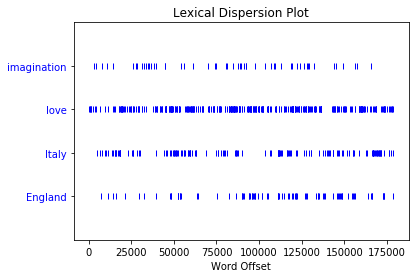

In [35]:
import numpy
import matplotlib
%matplotlib inline

text_dict['corinne.txt'].dispersion_plot(['imagination','love','Italy','England'])

### Exercise 5.2: Play around

You can find a full list of all the `Text()` methods in [the relevant section of the nltk website](http://www.nltk.org/api/nltk.html#nltk.text.Text). Have a play, see if you can find out anything interesting about your corpus of texts! The cell below is blank: do with it what you like...

In [0]:
# YOUR CODE HERE
